In [1]:
import xarray as xr
import numpy as np
import intake

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
gl_cat=intake.open_catalog("https://raw.githubusercontent.com/CliDyn/GlobalLab_hackathon_2025/refs/heads/main/catalog/main.yaml")

organisation="AWI" # ICCP, 
expid = 'UHR_N39'  # "UHR_N43"

realm='ocean'  # 'ocean' , 'atmos'
gridspec = 'native' # 'native', 'remap'

cat_data=gl_cat[organisation][expid][realm][gridspec]
print(list(cat_data))

['ocean_monthly']


In [3]:
data = cat_data['ocean_monthly'].to_dask()

In [4]:
data

<xarray.Dataset>
Dimensions:       (time: 768, nod2: 12952215, nz: 48, nz1: 47)
Coordinates:
  * nz            (nz) float64 0.0 5.0 10.0 20.0 ... 5.65e+03 6e+03 6.25e+03
  * nz1           (nz1) float64 2.5 7.5 15.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time          (time) datetime64[ns] 1951-01-31T23:57:00 ... 2014-12-31T23...
Dimensions without coordinates: nod2
Data variables: (12/16)
    MLD1          (time, nod2) float32 dask.array<chunksize=(1, 65536), meta=np.ndarray>
    MLD2          (time, nod2) float32 dask.array<chunksize=(1, 65536), meta=np.ndarray>
    MLD3          (time, nod2) float32 dask.array<chunksize=(1, 65536), meta=np.ndarray>
    N2            (time, nz, nod2) float32 dask.array<chunksize=(1, 3, 996325), meta=np.ndarray>
    alb           (time, nod2) float32 dask.array<chunksize=(1, 65536), meta=np.ndarray>
    ist           (time, nod2) float32 dask.array<chunksize=(1, 65536), meta=np.ndarray>
    ...            ...
    qsi           (time, nod2) float32 dask.array<chunksize=(1, 65536), meta=np.ndarray>
    salt          (time, nz1, nod2) float32 dask.array<chunksize=(1, 3, 996325), meta=np.ndarray>
    temp          (time, nz1, nod2) float32 dask.array<chunksize=(1, 3, 996325), meta=np.ndarray>
    unod          (time, nz1, nod2) float32 dask.array<chunksize=(1, 3, 996325), meta=np.ndarray>
    vnod          (time, nz1, nod2) float32 dask.array<chunksize=(1, 3, 996325), meta=np.ndarray>
    w             (time, nz, nod2) float32 dask.array<chunksize=(1, 3, 996325), meta=np.ndarray>
Attributes: (12/20)
    CDI:                           Climate Data Interface version 2.0.5 (http...
    Conventions:                   CF-1.6
    FESOM_model:                   FESOM2
    FESOM_website:                 fesom.de
    FESOM_git_SHA:                 e23bc823
    FESOM_MeshPath:                /work/ab0995/a270067/fesom2/next/mesh/
    ...                            ...
    FESOM_evp_rheol_steps:         120
    FESOM_opt_visc:                7
    FESOM_use_wsplit:              -1
    FESOM_autorotate_back_to_geo:  0
    history:                       Wed Aug 14 11:54:45 2024: cdo cat w.fesom....
    CDO:                           Climate Data Operators version 2.0.5 (http...

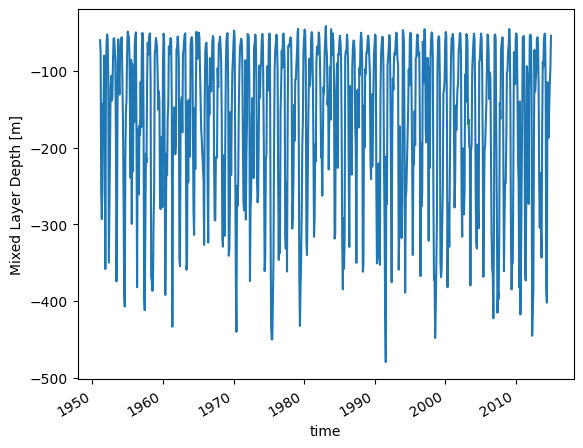

In [5]:
data['MLD1'][:,100].plot()

In [18]:
grid = xr.open_dataset('/work/ab0995/a270088/meshes/NEXT/fesom.mesh.diag.nc')

In [19]:
lon = grid.lon.values
lat = grid.lat.values
data_sample_3d = data['temp'][0,:,:]

In [20]:
data_sample_3d

<xarray.DataArray 'temp' (nz1: 47, nod2: 12952215)>
dask.array<getitem, shape=(47, 12952215), dtype=float32, chunksize=(3, 996325), chunktype=numpy.ndarray>
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
    time     datetime64[ns] 1951-01-31T23:57:00
Dimensions without coordinates: nod2
Attributes:
    long_name:    temperature
    units:        C
    description:  temperature

In [21]:
nod_area = grid['nod_area']

In [22]:
nod_area

<xarray.DataArray 'nod_area' (nz: 48, nod2: 12952215)>
[621706320 values with dtype=float64]
Coordinates:
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
Dimensions without coordinates: nod2
Attributes:
    long_name:  nodal areas

In [23]:
nod_area = grid['nod_area']
nod_area = nod_area.rename({'nz':'nz1'})

In [24]:
nod_area

<xarray.DataArray 'nod_area' (nz1: 48, nod2: 12952215)>
[621706320 values with dtype=float64]
Coordinates:
  * nz1      (nz1) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
Dimensions without coordinates: nod2
Attributes:
    long_name:  nodal areas

In [25]:
nod_area_47 = nod_area.isel(nz1=slice(0, data_sample_3d.sizes['nz1']))
nod_area_same = xr.DataArray(
    nod_area_47.values,          # (69, 7402886)
    dims=data_sample_3d.dims,    # ('lev', 'ncells')
    coords=data_sample_3d.coords,
    name="nod_area",
)

In [16]:
nod_area_same

<xarray.DataArray 'nod_area' (nz1: 47, nod2: 12952215)>
array([[ 6645573.10478827, 15559082.64858002, 23634525.37702074, ...,
        22950445.97155835, 22242625.99092964,  6883961.07622058],
       [ 6645573.10478827, 15559082.64858002, 23634525.37702074, ...,
        22950445.97155835, 22242625.99092964,  6883961.07622058],
       [ 6645573.10478827, 15559082.64858002, 23634525.37702074, ...,
        22950445.97155835, 22242625.99092964,  6883961.07622058],
       ...,
       [       0.        ,        0.        ,        0.        , ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        , ...,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        , ...,
               0.        ,        0.        ,        0.        ]])
Coordinates:
  * nz1      (nz1) float64 2.5 7.5 15.0 25.0 ... 5.525e+03 5.825e+03 6.125e+03
    time     datetime64[ns] 1951-01-31T23:57:00
Dimensions without coordinates: nod2

In [18]:
data_sample = data['temp'][0,0,:]

### Spatial mean the right way (weighted mean)

In [20]:
((data_sample*nod_area_same[0,:]).sum(dim='nod2')/nod_area_same[0,:].sum(dim='nod2')).values

array(17.913511)

### Vertical Profiles

In [21]:
weighted = (data_sample_3d * nod_area_same).sum(dim='nod2')/nod_area_same.sum(dim='nod2')

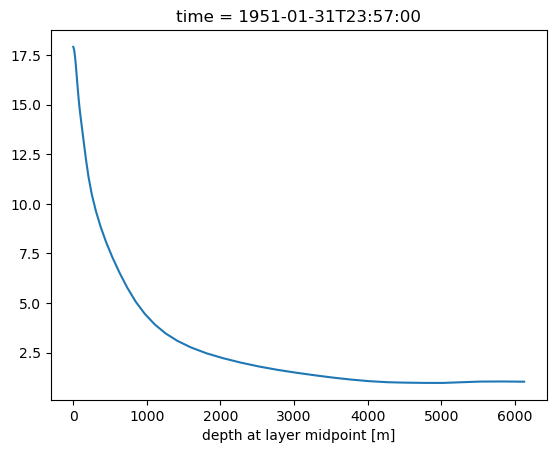

In [22]:
weighted.plot()

Text(0, 0.5, 'Depth [m]')

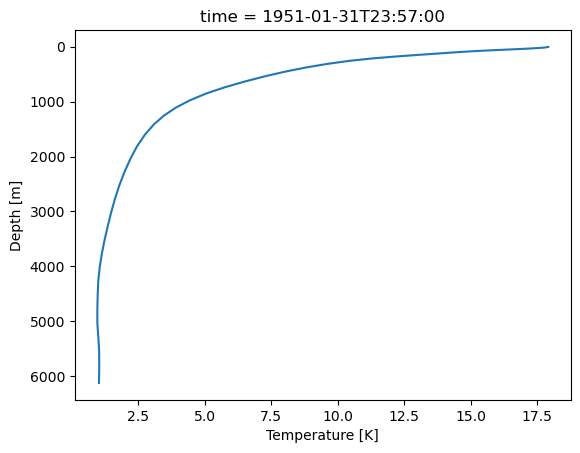

In [24]:
lines = weighted.plot(y='nz1')  # x = data (temperature), y = lev (depth)
ax = lines[0].axes             # get the Axes from the Line2D

ax.invert_yaxis()              # depth increasing downward
ax.set_xlabel("Temperature [K]")  # or °C if you convert
ax.set_ylabel("Depth [m]")

In [5]:
from dask.distributed import Client
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
# dask.config.set({'temporary_directory': '/scratch/a/a270088/dask/'})
# client = Client(n_workers=5, threads_per_worker=1, memory_limit='50GB')
client = Client(n_workers=20, threads_per_worker=1, memory_limit='10GB')
client

2025-12-08 11:29:38,086 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-1bjg1v2s', purging
2025-12-08 11:29:38,086 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-8p54_hl3', purging
2025-12-08 11:29:38,086 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-6188aozg', purging
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Workers: 20
Total threads: 20,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42335,Workers: 20
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Total threads: 20
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:33701,Total threads: 1
Dashboard: /user/a270088/levante-spawner-preset//proxy/44291/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:43547,


In [6]:
ds = cat_data['ocean_monthly'](chunks="auto").to_dask()
ds

<xarray.Dataset>
Dimensions:       (time: 768, nod2: 12952215, nz: 48, nz1: 47)
Coordinates:
  * nz            (nz) float64 0.0 5.0 10.0 20.0 ... 5.65e+03 6e+03 6.25e+03
  * nz1           (nz1) float64 2.5 7.5 15.0 ... 5.525e+03 5.825e+03 6.125e+03
  * time          (time) datetime64[ns] 1951-01-31T23:57:00 ... 2014-12-31T23...
Dimensions without coordinates: nod2
Data variables: (12/16)
    MLD1          (time, nod2) float32 dask.array<chunksize=(22, 1441792), meta=np.ndarray>
    MLD2          (time, nod2) float32 dask.array<chunksize=(22, 1441792), meta=np.ndarray>
    MLD3          (time, nod2) float32 dask.array<chunksize=(22, 1441792), meta=np.ndarray>
    N2            (time, nz, nod2) float32 dask.array<chunksize=(2, 6, 1992650), meta=np.ndarray>
    alb           (time, nod2) float32 dask.array<chunksize=(22, 1441792), meta=np.ndarray>
    ist           (time, nod2) float32 dask.array<chunksize=(22, 1441792), meta=np.ndarray>
    ...            ...
    qsi           (time, nod2) float32 dask.array<chunksize=(22, 1441792), meta=np.ndarray>
    salt          (time, nz1, nod2) float32 dask.array<chunksize=(2, 6, 1992650), meta=np.ndarray>
    temp          (time, nz1, nod2) float32 dask.array<chunksize=(2, 6, 1992650), meta=np.ndarray>
    unod          (time, nz1, nod2) float32 dask.array<chunksize=(2, 6, 1992650), meta=np.ndarray>
    vnod          (time, nz1, nod2) float32 dask.array<chunksize=(2, 6, 1992650), meta=np.ndarray>
    w             (time, nz, nod2) float32 dask.array<chunksize=(2, 6, 1992650), meta=np.ndarray>
Attributes: (12/20)
    CDI:                           Climate Data Interface version 2.0.5 (http...
    Conventions:                   CF-1.6
    FESOM_model:                   FESOM2
    FESOM_website:                 fesom.de
    FESOM_git_SHA:                 e23bc823
    FESOM_MeshPath:                /work/ab0995/a270067/fesom2/next/mesh/
    ...                            ...
    FESOM_evp_rheol_steps:         120
    FESOM_opt_visc:                7
    FESOM_use_wsplit:              -1
    FESOM_autorotate_back_to_geo:  0
    history:                       Wed Aug 14 11:54:45 2024: cdo cat w.fesom....
    CDO:                           Climate Data Operators version 2.0.5 (http...

In [15]:
time_period = ds['temp'].sel(time=slice('1951-01', '1955-12'))

In [16]:
time_period_mean = time_period.mean(dim='time').compute()

In [26]:
time_period_weighted_integral = ((time_period_mean*nod_area_same).sum(dim='nod2')/nod_area_same.sum(dim='nod2'))

Text(0, 0.5, 'Depth [m]')

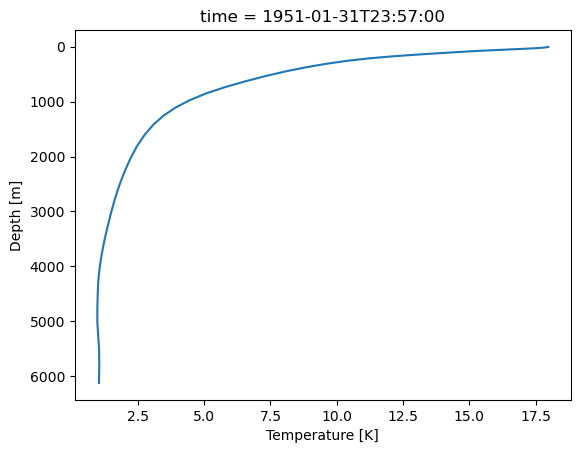

In [27]:
lines = time_period_weighted_integral.plot(y='nz1')  # x = data (temperature), y = lev (depth)
ax = lines[0].axes             # get the Axes from the Line2D

ax.invert_yaxis()              # depth increasing downward
ax.set_xlabel("Temperature [K]")  # or °C if you convert
ax.set_ylabel("Depth [m]")